

### 📌 **Adult Income Dataset – Summary**

- **Goal**: Predict if a person earns **> $50K or ≤ $50K/year**.
- **Source**: UCI Machine Learning Repository.
- **Type**: Supervised binary classification.
- **Target Variable**:  
  - `income`: `>50K` or `<=50K`.



### 🔑 **Key Features**:
- **Numerical**: `age`, `fnlwgt`, `education-num`, `capital-gain`, `capital-loss`, `hours-per-week`.
- **Categorical**: `workclass`, `education`, `marital-status`, `occupation`, `relationship`, `race`, `sex`, `native-country`.



# 1. Install & Import Required Libraries

In [1]:
# Install H2O
!pip install -f https://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

# Import libraries
import h2o
from h2o.estimators import (
    H2ORandomForestEstimator,
    H2OGradientBoostingEstimator,
    H2ODeepLearningEstimator,
    H2OGeneralizedLinearEstimator
)
import matplotlib.pyplot as plt
from google.colab import files


Looking in links: https://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.9/265.9 MB 4.4 MB/s eta 0:00:00


# 2. Initialize H2O and Upload Dataset

In [2]:
# Initialize H2O
h2o.init()

# Upload the dataset
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Import data into H2O
data = h2o.import_file(filename)

# Print column names
print("Columns:", data.columns)


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.26" 2025-01-21; OpenJDK Runtime Environment (build 11.0.26+4-post-Ubuntu-1ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.26+4-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.11/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpzbuhayeu
  JVM stdout: /tmp/tmpzbuhayeu/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpzbuhayeu/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,11 days
H2O_cluster_name:,H2O_from_python_unknownUser_ssxiao
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Saving adult.csv to adult.csv
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Columns: ['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']


# 3. Data Preprocessing

In [3]:
# Handle missing values
data = data.na_omit()  # Alternatively: Use h2o.impute for imputation

# Set target and features
y = "income"  # target column
x = [col for col in data.columns if col != y]

# Convert categorical features to factors
for col in data.columns:
    if data[col].isfactor()[0] or data[col].ischaracter()[0]:
        data[col] = data[col].asfactor()


# 4. Train-Test Split

In [4]:
# Split into train/test sets
train, test = data.split_frame(ratios=[0.8], seed=42)


# 5. Model Building

In [5]:
# Define models
rf_model = H2ORandomForestEstimator(seed=42)
gbm_model = H2OGradientBoostingEstimator(seed=42)
dl_model = H2ODeepLearningEstimator(seed=42)
glm_model = H2OGeneralizedLinearEstimator(family="binomial")

# Train models
for model in [rf_model, gbm_model, dl_model, glm_model]:
    model.train(x=x, y=y, training_frame=train)


drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


# 6. Model Evaluation

In [6]:
# Evaluation function
def evaluate_model(model, test_data):
    perf = model.model_performance(test_data)
    accuracy = perf.accuracy()[0][1]
    auc = perf.auc()
    precision = perf.precision()[0][1]
    recall = perf.recall()[0][1]
    cm = perf.confusion_matrix()
    return accuracy, auc, precision, recall, cm


In [7]:
# Evaluate and compare models
models = [rf_model, gbm_model, dl_model, glm_model]
model_names = ['Random Forest', 'Gradient Boosting', 'Deep Learning', 'Logistic Regression']
accuracies, aucs, precisions, recalls = [], [], [], []

for model, name in zip(models, model_names):
    accuracy, auc, precision, recall, cm = evaluate_model(model, test)
    accuracies.append(accuracy)
    aucs.append(auc)
    precisions.append(precision)
    recalls.append(recall)

    print(f"\nModel: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC: {auc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print("Confusion Matrix:")
    print(cm)



Model: Random Forest
Accuracy: 0.8632
AUC: 0.9186
Precision: 1.0000
Recall: 1.0000
Confusion Matrix:
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3430606263577938
       <=50K    >50K    Error    Rate
-----  -------  ------  -------  ---------------
<=50K  6411     964     0.1307   (964.0/7375.0)
>50K   533      1806    0.2279   (533.0/2339.0)
Total  6944     2770    0.1541   (1497.0/9714.0)

Model: Gradient Boosting
Accuracy: 0.8668
AUC: 0.9257
Precision: 1.0000
Recall: 1.0000
Confusion Matrix:
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.29004139461308975
       <=50K    >50K    Error    Rate
-----  -------  ------  -------  ---------------
<=50K  6349     1026    0.1391   (1026.0/7375.0)
>50K   429      1910    0.1834   (429.0/2339.0)
Total  6778     2936    0.1498   (1455.0/9714.0)

Model: Deep Learning
Accuracy: 0.8569
AUC: 0.9138
Precision: 0.9890
Recall: 1.0000
Confusion Matrix:
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.29841456351728873
       

# 7. Plotting Model Comparison

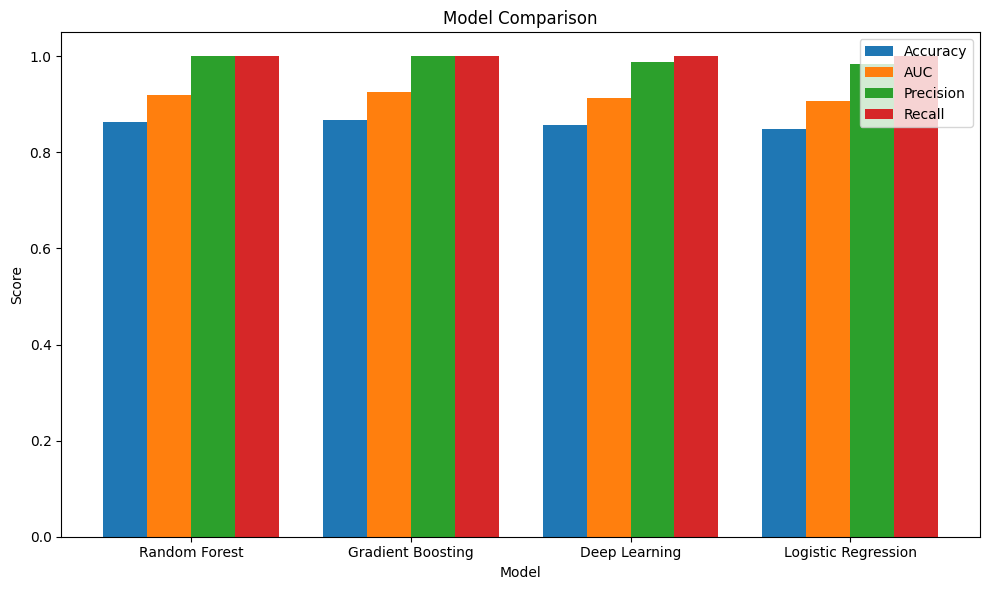

In [8]:
# Plot Accuracy vs AUC vs Precision vs Recall
plt.figure(figsize=(10, 6))
bar_width = 0.2
index = range(len(model_names))

plt.bar(index, accuracies, bar_width, label='Accuracy')
plt.bar([i + bar_width for i in index], aucs, bar_width, label='AUC')
plt.bar([i + 2 * bar_width for i in index], precisions, bar_width, label='Precision')
plt.bar([i + 3 * bar_width for i in index], recalls, bar_width, label='Recall')

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Comparison')
plt.xticks([i + 1.5 * bar_width for i in index], model_names)
plt.legend()
plt.tight_layout()
plt.show()


# 8. Identify Best Model & Feature Importance

In [9]:
# Best model based on accuracy
best_model_index = accuracies.index(max(accuracies))
best_model = models[best_model_index]
print(f"\nBest Model: {model_names[best_model_index]}")



Best Model: Gradient Boosting



Feature Importance:
           variable  relative_importance  scaled_importance  percentage
0      relationship          5088.340820           1.000000    0.261319
1      capital-gain          3867.865234           0.760143    0.198640
2         education          3125.819824           0.614310    0.160531
3    marital-status          2476.487305           0.486698    0.127183
4        occupation          1867.033569           0.366924    0.095884
5      capital-loss          1126.741943           0.221436    0.057865
6               age           905.520996           0.177960    0.046504
7    hours-per-week           542.394592           0.106596    0.027855
8    native-country           203.168015           0.039928    0.010434
9         workclass           163.848358           0.032201    0.008415
10           gender            63.231400           0.012427    0.003247
11           fnlwgt            36.774559           0.007227    0.001889
12             race             4.268698   

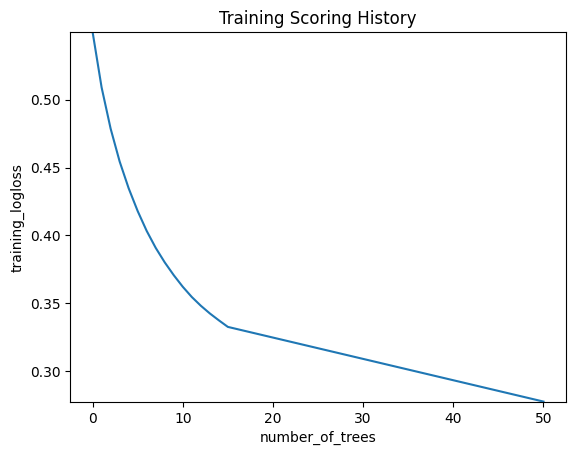

In [10]:
# Show feature importance
if hasattr(best_model, 'varimp'):
    feature_importance = best_model.varimp(use_pandas=True)
    print("\nFeature Importance:")
    print(feature_importance)
    best_model.plot()


In [11]:
# Simple discussion of top features
print("\nFeature Importance Discussion:")
print(f"The most important features in predicting '{y}' were: {', '.join(feature_importance['variable'].head(3))}.")
print("These features likely have strong predictive power due to their direct correlation with income levels, such as education, occupation, and hours per week worked.")



Feature Importance Discussion:
The most important features in predicting 'income' were: relationship, capital-gain, education.
These features likely have strong predictive power due to their direct correlation with income levels, such as education, occupation, and hours per week worked.
